In [1]:
# !pip install seaborn librosa scikit-learn tensorflow keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Audio

import librosa
import librosa.display
import random


from sklearn.model_selection import train_test_split
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

c:\Users\syeda.fatima\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# !pip install h5py

In [4]:
# import h5py
# import numpy as np
# f = h5py.File('spectrograms.h5', 'r')
# list(f.keys())

In [5]:
# dset = f['blujay']
# dset.shape

In [6]:
# dset = f['amecro']
# dset.shape

In [7]:
import h5py
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Load the data
f = h5py.File('spectrograms.h5', 'r')

# Extract data for binary classification
blujay = np.array(f['blujay'])
amecro = np.array(f['amecro'])

# Reshape the data
blujay = np.transpose(blujay, (2, 0, 1))  # From (256, 343, 50) to (50, 256, 343)
amecro = np.transpose(amecro, (2, 0, 1))  # From (256, 343, 52) to (52, 256, 343)

# Combine the data
X = np.concatenate([blujay, amecro], axis=0)
y = np.array([0] * blujay.shape[0] + [1] * amecro.shape[0])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[1] * X_train.shape[2])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[1] * X_test.shape[2])).reshape(X_test.shape)


In [8]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} - Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} - Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.4052 - loss: 1.6053 - val_accuracy: 0.6667 - val_loss: 0.8337
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.7880 - loss: 0.4957 - val_accuracy: 0.8095 - val_loss: 0.6555
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.8036 - loss: 0.4599 - val_accuracy: 0.8095 - val_loss: 0.4590
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.8719 - loss: 0.3469 - val_accuracy: 0.9524 - val_loss: 0.3177
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9659 - loss: 0.2703 - val_accuracy: 0.7143 - val_loss: 0.3117
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9402 - loss: 0.1984 - val_accuracy: 0.9524 - val_loss: 0.1885
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9837 - loss: 0.1081 - val_accuracy: 0.9524 - val_loss: 0.1827
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9938 - loss: 0.0680 - val_accuracy: 0.9524 - val_loss: 0.1841
Epoch 9/10
3/3 

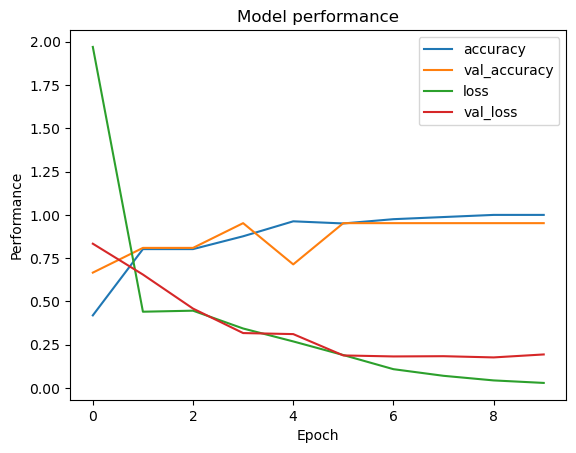

Test Accuracy: 85.71%
Test Loss: 0.5558


In [9]:
np.random.seed(123)
tf.random.set_seed(123)

bin1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(256,343,1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

bin1.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

history = bin1.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model performance')
plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.show()

test_loss, test_accuracy = bin1.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.4432 - loss: 1.7298 - val_accuracy: 0.6190 - val_loss: 1.5817
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.7398 - loss: 0.7901 - val_accuracy: 0.7143 - val_loss: 0.9751
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.7929 - loss: 0.5829 - val_accuracy: 0.8095 - val_loss: 0.7074
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.8400 - loss: 0.4822 - val_accuracy: 0.8571 - val_loss: 0.3071
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.9054 - loss: 0.2812 - val_accuracy: 0.8571 - val_loss: 0.3030
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.9216 - loss: 0.2232 - val_accuracy: 0.7619 - val_loss: 0.3457
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.9418 - loss: 0.2163 - val_accuracy: 1.0000 - val_loss: 0.1779
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.9659 - loss: 0.1291 - val_accuracy: 0.9524 - val_loss: 0.1680
Epoch 9/20
3/3 

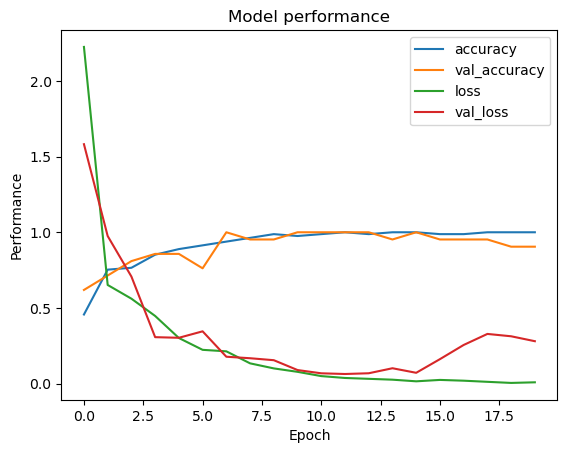

Test Accuracy: 90.48%
Test Loss: 0.5568


In [10]:
np.random.seed(123)
tf.random.set_seed(123)

bin_dropout = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(256,343,1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

bin_dropout.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

history = bin_dropout.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=20)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model performance')
plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.show()

test_loss, test_accuracy = bin_dropout.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.4891 - loss: 1.4290 - val_accuracy: 0.6667 - val_loss: 1.2778
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.8019 - loss: 0.6098 - val_accuracy: 0.7619 - val_loss: 0.9410
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.7655 - loss: 0.5790 - val_accuracy: 0.8095 - val_loss: 0.4886
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.8501 - loss: 0.3468 - val_accuracy: 0.9524 - val_loss: 0.2822
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.9496 - loss: 0.2519 - val_accuracy: 0.6667 - val_loss: 0.3972
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.8842 - loss: 0.2169 - val_accuracy: 0.9524 - val_loss: 0.2064
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.9899 - loss: 0.1136 - val_accuracy: 0.8571 - val_loss: 0.2035
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.9899 - loss: 0.0848 - val_accuracy: 0.9524 - val_loss: 0.1386
Epoch 9/20
3/

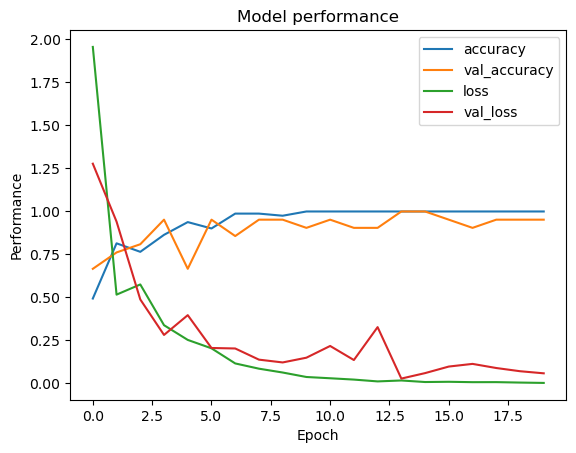

Test Accuracy: 95.24%
Test Loss: 0.2967


In [11]:

np.random.seed(123)
tf.random.set_seed(123)

bin2_dropout_03= tf.keras.Sequential([
    tf.keras.layers.Input(shape=(256,343,1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

bin2_dropout_03.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

history = bin2_dropout_03.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=20)


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model performance')
plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.show()

test_loss, test_accuracy = bin2_dropout_03.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

Batch Normalization

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.7197 - loss: 1.6051 - val_accuracy: 0.7619 - val_loss: 0.5879 - learning_rate: 1.0000e-04
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.8338 - loss: 1.3670 - val_accuracy: 0.6667 - val_loss: 0.5169 - learning_rate: 1.0000e-04
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 0.8735 - loss: 0.7051 - val_accuracy: 0.6190 - val_loss: 0.5302 - learning_rate: 1.0000e-04
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.9434 - loss: 0.4180 - val_accuracy: 0.6190 - val_loss: 0.5550 - learning_rate: 1.0000e-04
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 0.9099 - loss: 0.5587 - val_accuracy: 0.6190 - val_loss: 0.5259 - learning_rate: 1.0000e-04
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.9535 - loss: 0.5138 - val_accuracy: 0.6667 - val_loss: 0.5641 - learning_rate: 5.0000e-05
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.9379 - loss: 0.4319 - val_

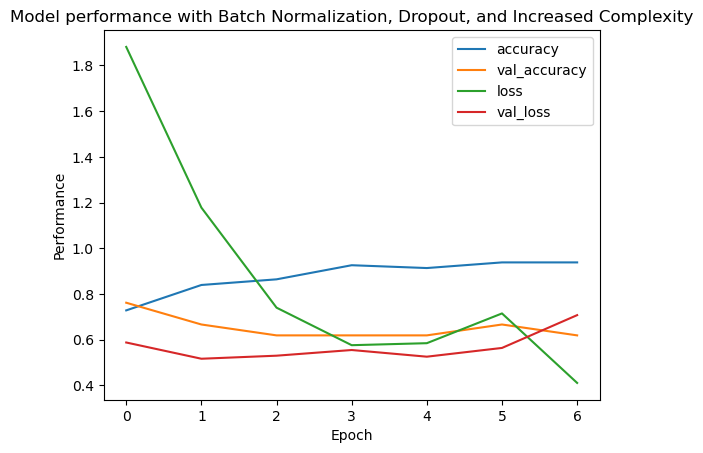

In [15]:

np.random.seed(123)
tf.random.set_seed(123)

bin2_norm = Sequential([
    tf.keras.layers.Input(shape=(256, 343, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

# with a lower learning rate
bin2_norm.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = bin2_norm.fit(np.expand_dims(X_train_scaled, axis=-1), y_train, validation_data=(np.expand_dims(X_test_scaled, axis=-1), y_test), epochs=20, callbacks=[early_stopping, reduce_lr])

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model performance with Batch Normalization, Dropout, and Increased Complexity')
plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.show()

In [14]:


test_loss, test_accuracy = bin2_norm.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [ ]:
import tensorflow as tf
from sklearn.metrics import log_loss
import numpy as np

models = {
    'sigmoid_1': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    'relu_1': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    'leaky_relu_1': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU()),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    'tanh_1': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
}

results = {}


for name, model in models.items():
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test), verbose=0)
    

    val_loss, val_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    predictions = model.predict(X_test_scaled)
    cv_error_rate = log_loss(y_test, predictions)
    
    results[name] = {
        'Cross Validation Error': cv_error_rate,
        'Accuracy Rate': val_accuracy
    }


for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Cross Validation Error: {metrics['Cross Validation Error']:.2f}")
    print(f"Accuracy Rate: {metrics['Accuracy Rate']*100:.2f}%")
    print("-----")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
Model: sigmoid_1
Cross Validation Error: 0.40
Accuracy Rate: 80.95%
-----
Model: relu_1
Cross Validation Error: 0.77
Accuracy Rate: 95.24%
-----
Model: leaky_relu_1
Cross Validation Error: 0.12
Accuracy Rate: 90.48%
-----
Model: tanh_1
Cross Validation Error: 0.21
Accuracy Rate: 100.00%
-----


In [ ]:
import tensorflow as tf
from sklearn.metrics import log_loss
import numpy as np

models = {
    'sigmoid_2': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    'relu_2': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    'leaky_relu_2': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU()),
        tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU()),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    'tanh_2': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
}

results = {}


for name, model in models.items():
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(np.expand_dims(X_train_scaled, axis=-1), y_train, epochs=10, validation_data=(np.expand_dims(X_test_scaled, axis=-1), y_test), verbose=0)
    

    val_loss, val_accuracy = model.evaluate(np.expand_dims(X_test_scaled, axis=-1), y_test, verbose=0)
    predictions = model.predict(np.expand_dims(X_test_scaled, axis=-1))
    cv_error_rate = log_loss(y_test, predictions)
    
    results[name] = {
        'Cross Validation Error': cv_error_rate,
        'Accuracy Rate': val_accuracy
    }


for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Cross Validation Error: {metrics['Cross Validation Error']:.2f}")
    print(f"Accuracy Rate: {metrics['Accuracy Rate']*100:.2f}%")
    print("-----")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
Model: sigmoid_2
Cross Validation Error: 0.17
Accuracy Rate: 95.24%
-----
Model: relu_2
Cross Validation Error: 0.06
Accuracy Rate: 100.00%
-----
Model: leaky_relu_2
Cross Validation Error: 0.09
Accuracy Rate: 95.24%
-----
Model: tanh_2
Cross Validation Error: 0.09
Accuracy Rate: 100.00%
-----


In [ ]:
import tensorflow as tf
from sklearn.metrics import log_loss
import numpy as np

models = {
    'sigmoid_3': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(32, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    'relu_3': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    'leaky_relu_3': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU()),
        tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU()),
        tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU()),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    'tanh_3': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(32, activation='tanh'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
}

results = {}


for name, model in models.items():
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(np.expand_dims(X_train_scaled, axis=-1), y_train, epochs=10, validation_data=(np.expand_dims(X_test_scaled, axis=-1), y_test), verbose=0)
    

    val_loss, val_accuracy = model.evaluate(np.expand_dims(X_test_scaled, axis=-1), y_test, verbose=0)
    predictions = model.predict(np.expand_dims(X_test_scaled, axis=-1))
    cv_error_rate = log_loss(y_test, predictions)
    
    results[name] = {
        'Cross Validation Error': cv_error_rate,
        'Accuracy Rate': val_accuracy
    }


for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Cross Validation Error: {metrics['Cross Validation Error']:.2f}")
    print(f"Accuracy Rate: {metrics['Accuracy Rate']*100:.2f}%")
    print("-----")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
Model: sigmoid_3
Cross Validation Error: 0.32
Accuracy Rate: 90.48%
-----
Model: relu_3
Cross Validation Error: 0.11
Accuracy Rate: 95.24%
-----
Model: leaky_relu_3
Cross Validation Error: 0.07
Accuracy Rate: 100.00%
-----
Model: tanh_3
Cross Validation Error: 0.13
Accuracy Rate: 100.00%
-----


In [ ]:
import tensorflow as tf
from sklearn.metrics import log_loss
import numpy as np

models_1_layer_dropout = {
    'sigmoid_1_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='sigmoid'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    'relu_1_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    'leaky_relu_1_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU()),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    'tanh_1_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
}

results_1_layer_dropout = {}


for name, model in models_1_layer_dropout.items():
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(np.expand_dims(X_train_scaled, axis=-1), y_train, epochs=10, validation_data=(np.expand_dims(X_test_scaled, axis=-1), y_test), verbose=0)
    

    val_loss, val_accuracy = model.evaluate(np.expand_dims(X_test_scaled, axis=-1), y_test, verbose=0)
    predictions = model.predict(np.expand_dims(X_test_scaled, axis=-1))
    cv_error_rate = log_loss(y_test, predictions)
    
    results_1_layer_dropout[name] = {
        'Cross Validation Error': cv_error_rate,
        'Accuracy Rate': val_accuracy
    }

 for one hidden layer with dropout
print("One Hidden Layer with Dropout")
for model_name, metrics in results_1_layer_dropout.items():
    print(f"Model: {model_name}")
    print(f"Cross Validation Error: {metrics['Cross Validation Error']:.2f}")
    print(f"Accuracy Rate: {metrics['Accuracy Rate']*100:.2f}%")
    print("-----")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
One Hidden Layer with Dropout
Model: sigmoid_1_dropout
Cross Validation Error: 0.19
Accuracy Rate: 95.24%
-----
Model: relu_1_dropout
Cross Validation Error: 0.58
Accuracy Rate: 90.48%
-----
Model: leaky_relu_1_dropout
Cross Validation Error: 0.11
Accuracy Rate: 95.24%
-----
Model: tanh_1_dropout
Cross Validation Error: 0.08
Accuracy Rate: 100.00%
-----


In [ ]:
# Define models with two hidden layers and dropout
models_2_layers_dropout = {
    'sigmoid_2_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='sigmoid'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    'relu_2_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    'leaky_relu_2_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU()),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU()),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    'tanh_2_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
}

results_2_layers_dropout = {}


for name, model in models_2_layers_dropout.items():
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(np.expand_dims(X_train_scaled, axis=-1), y_train, epochs=10, validation_data=(np.expand_dims(X_test_scaled, axis=-1), y_test), verbose=0)
    

    val_loss, val_accuracy = model.evaluate(np.expand_dims(X_test_scaled, axis=-1), y_test, verbose=0)
    predictions = model.predict(np.expand_dims(X_test_scaled, axis=-1))
    cv_error_rate = log_loss(y_test, predictions)
    
    results_2_layers_dropout[name] = {
        'Cross Validation Error': cv_error_rate,
        'Accuracy Rate': val_accuracy
    }

 for two hidden layers with dropout
print("Two Hidden Layers with Dropout")
for model_name, metrics in results_2_layers_dropout.items():
    print(f"Model: {model_name}")
    print(f"Cross Validation Error: {metrics['Cross Validation Error']:.2f}")
    print(f"Accuracy Rate: {metrics['Accuracy Rate']*100:.2f}%")
    print("-----")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
Two Hidden Layers with Dropout
Model: sigmoid_2_dropout
Cross Validation Error: 0.33
Accuracy Rate: 95.24%
-----
Model: relu_2_dropout
Cross Validation Error: 0.08
Accuracy Rate: 100.00%
-----
Model: leaky_relu_2_dropout
Cross Validation Error: 0.13
Accuracy Rate: 95.24%
-----
Model: tanh_2_dropout
Cross Validation Error: 0.21
Accuracy Rate: 100.00%
-----


In [ ]:

models_3_layers_dropout = {
    'sigmoid_3_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='sigmoid'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='sigmoid'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    'relu_3_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    'leaky_relu_3_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU()),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU()),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU()),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    'tanh_3_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='tanh'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
}

results_3_layers_dropout = {}


for name, model in models_3_layers_dropout.items():
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(np.expand_dims(X_train_scaled, axis=-1), y_train, epochs=10, validation_data=(np.expand_dims(X_test_scaled, axis=-1), y_test), verbose=0)
    

    val_loss, val_accuracy = model.evaluate(np.expand_dims(X_test_scaled, axis=-1), y_test, verbose=0)
    predictions = model.predict(np.expand_dims(X_test_scaled, axis=-1))
    cv_error_rate = log_loss(y_test, predictions)
    
    results_3_layers_dropout[name] = {
        'Cross Validation Error': cv_error_rate,
        'Accuracy Rate': val_accuracy
    }

 for three hidden layers with dropout
print("Three Hidden Layers with Dropout")
for model_name, metrics in results_3_layers_dropout.items():
    print(f"Model: {model_name}")
    print(f"Cross Validation Error: {metrics['Cross Validation Error']:.2f}")
    print(f"Accuracy Rate: {metrics['Accuracy Rate']*100:.2f}%")
    print("-----")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
Three Hidden Layers with Dropout
Model: sigmoid_3_dropout
Cross Validation Error: 0.67
Accuracy Rate: 47.62%
-----
Model: relu_3_dropout
Cross Validation Error: 0.34
Accuracy Rate: 76.19%
-----
Model: leaky_relu_3_dropout
Cross Validation Error: 0.05
Accuracy Rate: 100.00%
-----
Model: tanh_3_dropout
Cross Validation Error: 0.35
Accuracy Rate: 85.71%
-----


multi class 

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((463, 256, 343, 1), (463, 12), (116, 256, 343, 1), (116, 12))

In [ ]:
import h5py
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

f = h5py.File('spectrograms.h5', 'r')

species_list = list(f.keys())

# Initialize lists to hold data and labels
X = []
y = []

# Load data for each species
for i, species in enumerate(species_list):
    data = np.array(f[species])
    data = np.transpose(data, (2, 0, 1))  # Transpose to shape (samples, 256, 343)
    X.append(data)
    y.append(np.full(data.shape[0], i))  # Create labels for the current species

# Convert lists to arrays
X = np.concatenate(X, axis=0)
y = np.concatenate(y, axis=0)

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, X.shape[1] * X.shape[2])).reshape(X.shape + (1,))

# Convert labels to categorical (one-hot encoding)
y_categorical = to_categorical(y, num_classes=len(species_list))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from sklearn.metrics import log_loss

# Define models with one hidden layer and dropout for multiclass classification
models_1_layer_dropout = {
    'sigmoid_1_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='sigmoid'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(species_list), activation='softmax')
    ]),
    'relu_1_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(species_list), activation='softmax')
    ]),
    'leaky_relu_1_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU()),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(species_list), activation='softmax')
    ]),
    'tanh_1_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(species_list), activation='softmax')
    ])
}

results_1_layer_dropout = {}


for name, model in models_1_layer_dropout.items():
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)
    

    val_loss, val_accuracy = model.evaluate(X_test, y_test, verbose=0)
    predictions = model.predict(X_test)
    cv_error_rate = log_loss(y_test, predictions)
    
    results_1_layer_dropout[name] = {
        'Cross Validation Error': cv_error_rate,
        'Accuracy Rate': val_accuracy
    }

print("One Hidden Layer with Dropout")
for model_name, metrics in results_1_layer_dropout.items():
    print(f"Model: {model_name}")
    print(f"Cross Validation Error: {metrics['Cross Validation Error']:.2f}")
    print(f"Accuracy Rate: {metrics['Accuracy Rate']*100:.2f}%")
    print("-----")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


c:\Users\syeda.fatima\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


c:\Users\syeda.fatima\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
One Hidden Layer with Dropout
Model: sigmoid_1_dropout
Cross Validation Error: 1.12
Accuracy Rate: 67.24%
-----
Model: relu_1_dropout
Cross Validation Error: 1.30
Accuracy Rate: 62.93%
-----
Model: leaky_relu_1_dropout
Cross Validation Error: 2.94
Accuracy Rate: 53.45%
-----
Model: tanh_1_dropout
Cross Validation Error: 1.12
Accuracy Rate: 63.79%
-----


In [ ]:
models_2_layers_dropout = {
    'sigmoid_2_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='sigmoid'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(species_list), activation='softmax')
    ]),
    'relu_2_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(species_list), activation='softmax')
    ]),
    'leaky_relu_2_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU()),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU()),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(species_list), activation='softmax')
    ]),
    'tanh_2_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(species_list), activation='softmax')
    ])
}

results_2_layers_dropout = {}


for name, model in models_2_layers_dropout.items():
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)
    

    val_loss, val_accuracy = model.evaluate(X_test, y_test, verbose=0)
    predictions = model.predict(X_test)
    cv_error_rate = log_loss(y_test, predictions)
    
    results_2_layers_dropout[name] = {
        'Cross Validation Error': cv_error_rate,
        'Accuracy Rate': val_accuracy
    }

 for two hidden layers with dropout
print("Two Hidden Layers with Dropout")
for model_name, metrics in results_2_layers_dropout.items():
    print(f"Model: {model_name}")
    print(f"Cross Validation Error: {metrics['Cross Validation Error']:.2f}")
    print(f"Accuracy Rate: {metrics['Accuracy Rate']*100:.2f}%")
    print("-----")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


c:\Users\syeda.fatima\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
Two Hidden Layers with Dropout
Model: sigmoid_2_dropout
Cross Validation Error: 1.69
Accuracy Rate: 54.31%
-----
Model: relu_2_dropout
Cross Validation Error: 1.99
Accuracy Rate: 36.21%
-----
Model: leaky_relu_2_dropout
Cross Validation Error: 1.82
Accuracy Rate: 57.76%
-----
Model: tanh_2_dropout
Cross Validation Error: 1.42
Accuracy Rate: 55.17%
-----


In [ ]:
models_3_layers_dropout = {
    'sigmoid_3_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='sigmoid'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='sigmoid'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(species_list), activation='softmax')
    ]),
    'relu_3_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(species_list), activation='softmax')
    ]),
    'leaky_relu_3_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU()),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU()),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU()),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(species_list), activation='softmax')
    ]),
    'tanh_3_dropout': tf.keras.Sequential([
        tf.keras.layers.Input(shape=(256, 343, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='tanh'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(species_list), activation='softmax')
    ])
}

results_3_layers_dropout = {}


for name, model in models_3_layers_dropout.items():
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)
    

    val_loss, val_accuracy = model.evaluate(X_test, y_test, verbose=0)
    predictions = model.predict(X_test)
    cv_error_rate = log_loss(y_test, predictions)
    
    results_3_layers_dropout[name] = {
        'Cross Validation Error': cv_error_rate,
        'Accuracy Rate': val_accuracy
    }

 for three hidden layers with dropout
print("Three Hidden Layers with Dropout")
for model_name, metrics in results_3_layers_dropout.items():
    print(f"Model: {model_name}")
    print(f"Cross Validation Error: {metrics['Cross Validation Error']:.2f}")
    print(f"Accuracy Rate: {metrics['Accuracy Rate']*100:.2f}%")
    print("-----")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


c:\Users\syeda.fatima\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Three Hidden Layers with Dropout
Model: sigmoid_3_dropout
Cross Validation Error: 2.34
Accuracy Rate: 24.14%
-----
Model: relu_3_dropout
Cross Validation Error: 2.38
Accuracy Rate: 12.93%
-----
Model: leaky_relu_3_dropout
Cross Validation Error: 1.97
Accuracy Rate: 44.83%
-----
Model: tanh_3_dropout
Cross Validation Error: 1.79
Accuracy Rate: 46.55%
-----


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.2919 - loss: 2.3504 - val_accuracy: 0.6034 - val_loss: 1.4103
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.8257 - loss: 0.7147 - val_accuracy: 0.6121 - val_loss: 1.2119
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.9012 - loss: 0.3245 - val_accuracy: 0.6552 - val_loss: 1.4785
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.9482 - loss: 0.1915 - val_accuracy: 0.6724 - val_loss: 1.2989
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.9527 - loss: 0.1174 - val_accuracy: 0.6810 - val_loss: 1.4599
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.9673 - loss: 0.0827 - val_accuracy: 0.6724 - val_loss: 1.6846
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9619 - loss: 0.0995 - val_accuracy: 0.6897 - val_loss: 1.4273
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.9914 - loss: 0.0433 - val_accuracy: 0.6293 - val_loss:

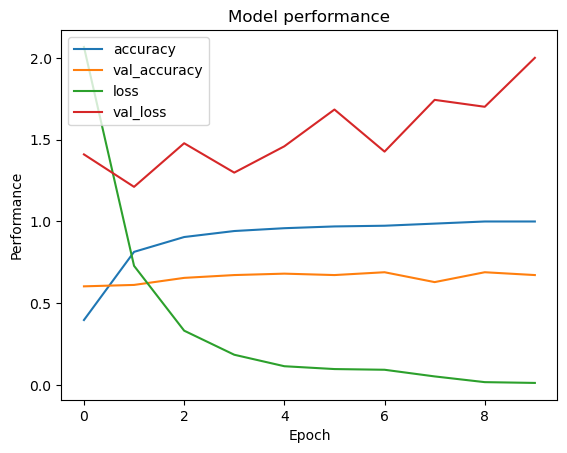

In [ ]:
np.random.seed(123)
tf.random.set_seed(123)

multiclass_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(256, 343, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(species_list), activation='softmax')  
])


multiclass_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = multiclass_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model performance')
plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.show()

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.2059 - loss: 2.5977 - val_accuracy: 0.5086 - val_loss: 2.0155
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.5472 - loss: 1.5366 - val_accuracy: 0.5948 - val_loss: 1.4664
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.7335 - loss: 0.9080 - val_accuracy: 0.6724 - val_loss: 1.1270
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.8537 - loss: 0.5616 - val_accuracy: 0.6983 - val_loss: 0.9540
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.8689 - loss: 0.4148 - val_accuracy: 0.6897 - val_loss: 0.9713
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9168 - loss: 0.3652 - val_accuracy: 0.6983 - val_loss: 0.9390
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9098 - loss: 0.2711 - val_accuracy: 0.7241 - val_loss: 0.8196
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.9414 - loss: 0.2013 - val_accuracy: 0.7328 - val_loss:

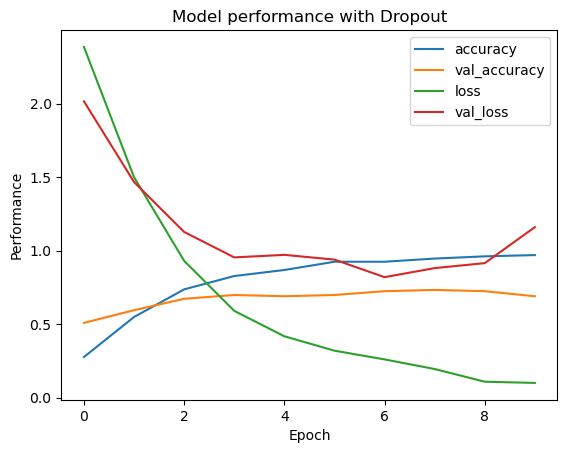

In [ ]:

np.random.seed(123)
tf.random.set_seed(123)

# Define the model for multiclass classification with dropout
multiclass_model_dropout = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(256, 343, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(species_list), activation='softmax')  # Softmax for multiclass classification
])


multiclass_model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = multiclass_model_dropout.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model performance with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.show()

In [ ]:
# Check the number of samples per class in the test set
unique, counts = np.unique(np.argmax(y_test, axis=1), return_counts=True)
print(dict(zip(species_list, counts)))


{'amecro': 8, 'barswa': 16, 'bkcchi': 12, 'blujay': 13, 'daejun': 14, 'houfin': 6, 'mallar3': 6, 'norfli': 6, 'rewbla': 11, 'stejay': 4, 'wesmea': 8, 'whcspa': 12}


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 473ms/step


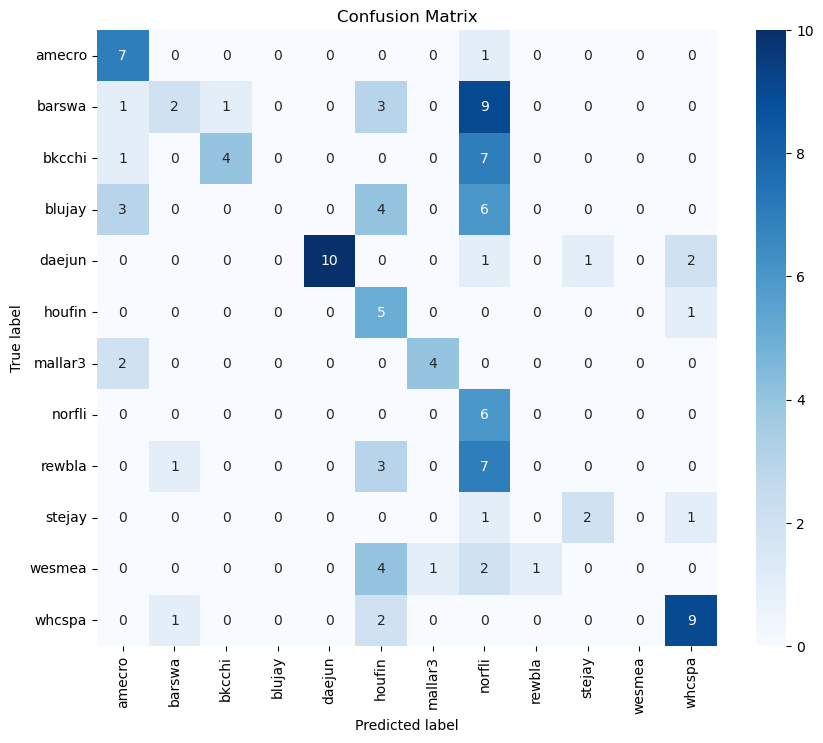

In [ ]:
# predictions for test set
y_pred = multiclass_model_dropout.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# true classes for test set
y_true = np.argmax(y_test, axis=1)

# confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=species_list, yticklabels=species_list)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.2061 - loss: 2.5890 - val_accuracy: 0.5345 - val_loss: 1.8063
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.5892 - loss: 1.4327 - val_accuracy: 0.6034 - val_loss: 1.3214
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.7666 - loss: 0.8414 - val_accuracy: 0.6638 - val_loss: 1.0348
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.8320 - loss: 0.5400 - val_accuracy: 0.7155 - val_loss: 0.9203
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.8939 - loss: 0.3619 - val_accuracy: 0.6724 - val_loss: 0.9656
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.9287 - loss: 0.2126 - val_accuracy: 0.7241 - val_loss: 0.9534
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.9354 - loss: 0.2008 - val_accuracy: 0.7069 - val_loss: 1.0282
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.9736 - loss: 0.1230 - val_accuracy: 0.6897 - val_loss:

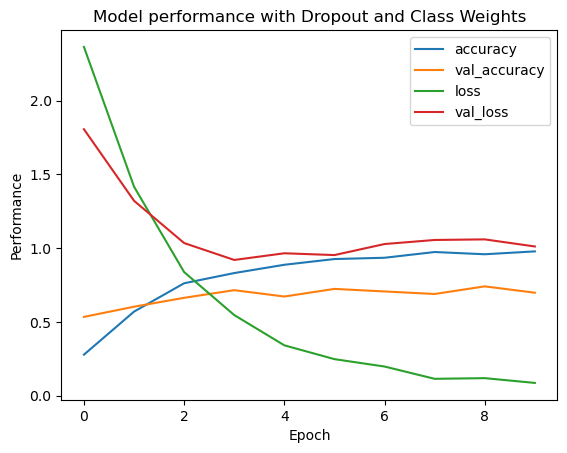

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 502ms/step


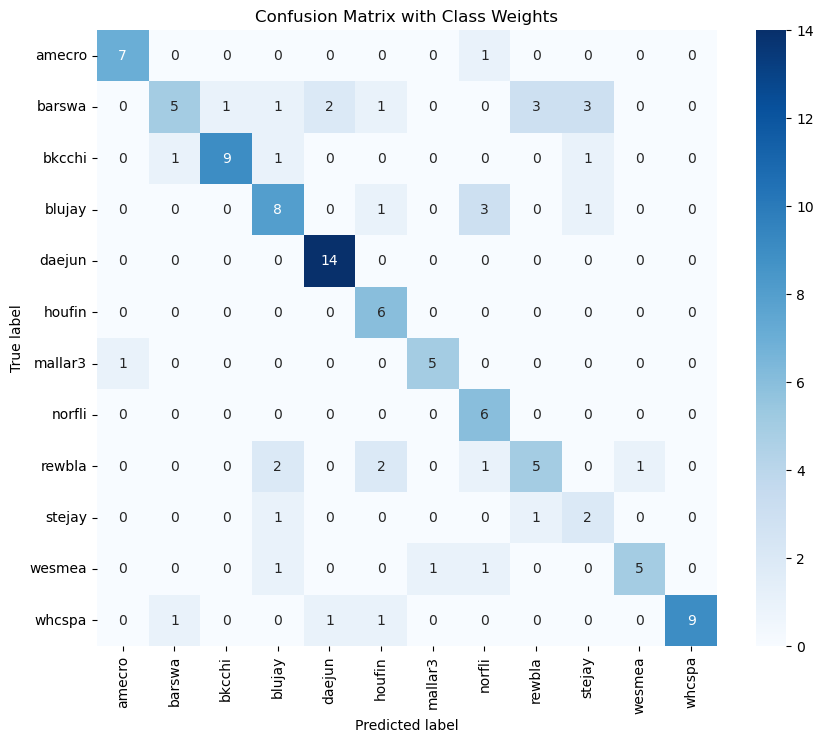

In [ ]:
from sklearn.utils import class_weight

# Calculate class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(np.argmax(y_train, axis=1)), y=np.argmax(y_train, axis=1))
class_weights_dict = dict(enumerate(class_weights))


np.random.seed(123)
tf.random.set_seed(123)

# Define the model for multiclass classification with dropout
multiclass_model_dropout = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(256, 343, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(species_list), activation='softmax')  
])


multiclass_model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = multiclass_model_dropout.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, class_weight=class_weights_dict)


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model performance with Dropout and Class Weights')
plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.show()

#  predictions for test set
y_pred = multiclass_model_dropout.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

#  true classes for test set
y_true = np.argmax(y_test, axis=1)

#  confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=species_list, yticklabels=species_list)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix with Class Weights')
plt.show()


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.2394 - loss: 2.4659 - val_accuracy: 0.4397 - val_loss: 1.8550
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.5719 - loss: 1.4343 - val_accuracy: 0.6379 - val_loss: 1.3651
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.7516 - loss: 0.7814 - val_accuracy: 0.6552 - val_loss: 1.1206
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8815 - loss: 0.4605 - val_accuracy: 0.6466 - val_loss: 1.2260
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.9188 - loss: 0.2764 - val_accuracy: 0.6724 - val_loss: 1.2450
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.9307 - loss: 0.2376 - val_accuracy: 0.6983 - val_loss: 0.9701
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.9564 - loss: 0.1511 - val_accuracy: 0.6983 - val_loss: 1.1118
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9347 - loss: 0.1748 - val_accuracy: 0.7155 - val_loss:

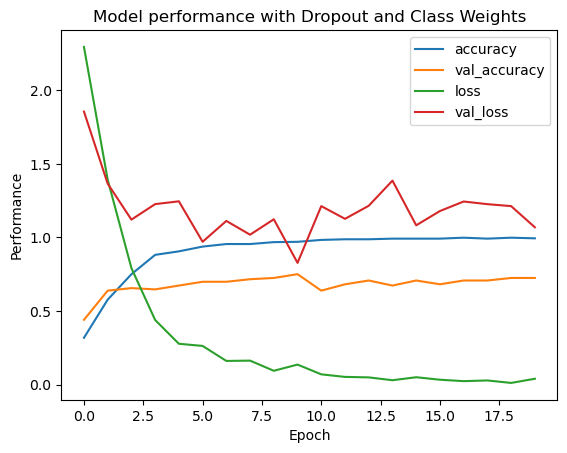

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 442ms/step


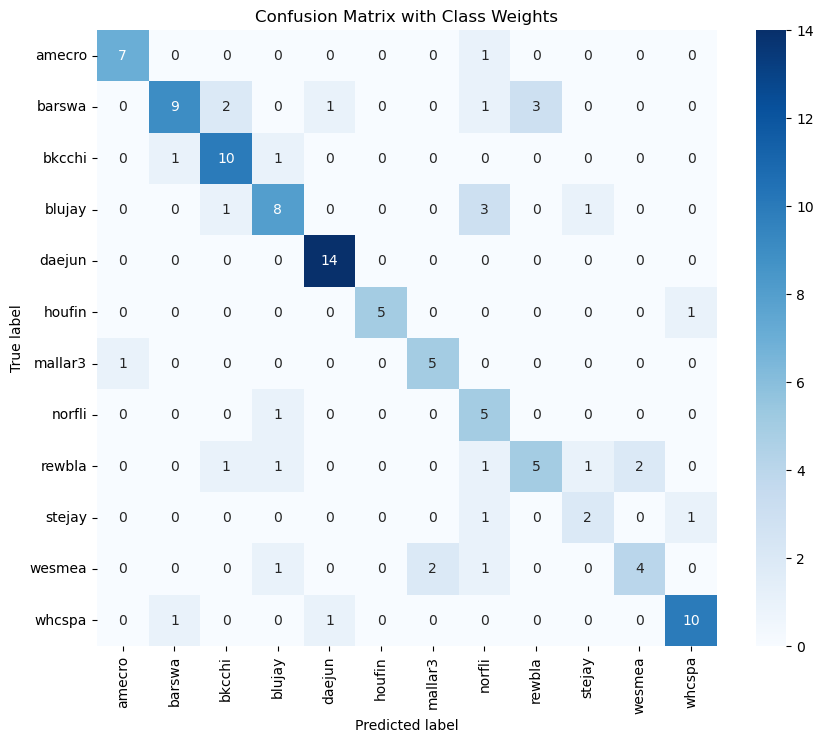

In [ ]:

# Calculate class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(np.argmax(y_train, axis=1)), y=np.argmax(y_train, axis=1))
class_weights_dict = dict(enumerate(class_weights))



np.random.seed(123)
tf.random.set_seed(123)

multiclass_model_dropout = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(256, 343, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(species_list), activation='softmax')  


multiclass_model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

 with class weights
history = multiclass_model_dropout.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, class_weight=class_weights_dict)


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model performance with Dropout and Class Weights')
plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.show()

# predictions for test set
y_pred = multiclass_model_dropout.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# true classes for test set
y_true = np.argmax(y_test, axis=1)

# confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=species_list, yticklabels=species_list)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix with Class Weights')
plt.show()


In [ ]:
train_loss, train_acc = multiclass_model_dropout.evaluate(X_train, y_train)
print(f'Train loss: {train_loss}, Train accuracy: {train_acc}')
     

15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 411ms/step - accuracy: 1.0000 - loss: 8.1664e-04
Train loss: 0.0009305505082011223, Train accuracy: 1.0


In [ ]:
test_loss, test_acc = multiclass_model_dropout.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 444ms/step - accuracy: 0.7292 - loss: 1.0125
Test loss: 1.0684994459152222, Test accuracy: 0.7241379022598267


In [ ]:
import librosa

def load_and_resample_audio(file_path, target_sr=22050):
    audio, sr = librosa.load(file_path, sr=None)
    if sr != target_sr:
        audio = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)
    return audio, target_sr

# Example usage:
audio_file_path = 'test_birds/test_birds/test1.mp3'  # Replace with your audio file path
audio, sr = load_and_resample_audio(audio_file_path)

print(f"Original Sample Rate: {sr}")
print(f"Resampled Audio Length: {len(audio)}")
print(f"Resampled Sample Rate: {sr}")


Original Sample Rate: 22050
Resampled Audio Length: 513216
Resampled Sample Rate: 22050


In [ ]:
import numpy as np

def get_loud_windows(audio, sr, window_duration=2, threshold=0.5):
    window_size = window_duration * sr
    loud_windows = []
    for start in range(0, len(audio), window_size // 2):  # Overlapping windows by 50%
        end = start + window_size
        window = audio[start:end]
        if len(window) == window_size and np.max(np.abs(window)) > threshold:
            loud_windows.append(window)
    return loud_windows

# Example usage:
loud_windows = get_loud_windows(audio, sr)
print(f"Number of 2-second loud windows: {len(loud_windows)}")


Number of 2-second loud windows: 0


In [ ]:
def print_audio_statistics(audio):
    max_val = np.max(np.abs(audio))
    mean_val = np.mean(np.abs(audio))
    print(f"Max value: {max_val}")
    print(f"Mean value: {mean_val}")

def get_loud_windows(audio, sr, window_duration=2, threshold=0.1):  # Lower threshold to 0.1
    window_size = window_duration * sr
    loud_windows = []
    for start in range(0, len(audio), window_size // 2):  # Overlapping windows by 50%
        end = start + window_size
        window = audio[start:end]
        if len(window) == window_size and np.max(np.abs(window)) > threshold:
            loud_windows.append(window)
    return loud_windows

# Print audio statistics to help choose an appropriate threshold
print_audio_statistics(audio)

# Example usage with a lower threshold
loud_windows = get_loud_windows(audio, sr, threshold=0.1)
print(f"Number of 2-second loud windows: {len(loud_windows)}")


Max value: 0.16520562767982483
Mean value: 0.012702243402600288
Number of 2-second loud windows: 4


Number of spectrograms generated: 4


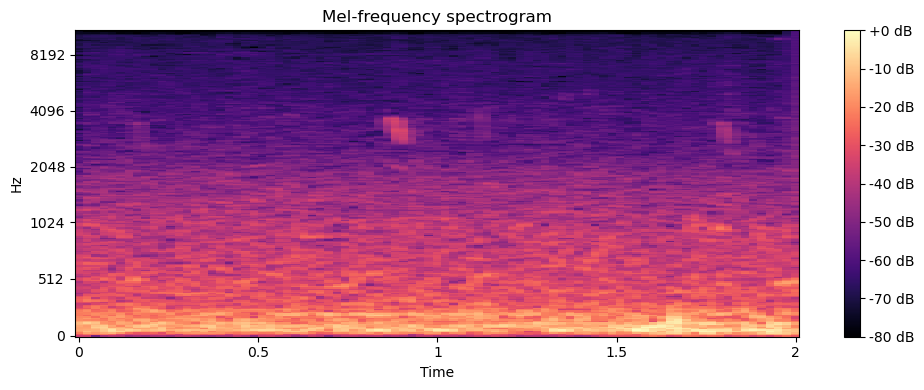

In [ ]:
import librosa.display

def generate_spectrograms(windows, sr):
    spectrograms = []
    for window in windows:
        spectrogram = librosa.feature.melspectrogram(y=window, sr=sr, n_mels=256, fmax=sr//2)
        spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
        spectrograms.append(spectrogram_db)
    return spectrograms

# Generate spectrograms
spectrograms = generate_spectrograms(loud_windows, sr)
print(f"Number of spectrograms generated: {len(spectrograms)}")

# Display one of the spectrograms as an example
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrograms[0], sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()


In [ ]:
for i, spectrogram in enumerate(spectrograms):
    print(f"Spectrogram {i+1} shape: {spectrogram.shape}")

Spectrogram 1 shape: (256, 87)
Spectrogram 2 shape: (256, 87)
Spectrogram 3 shape: (256, 87)
Spectrogram 4 shape: (256, 87)


In [ ]:
# Ensure spectrograms are correctly sized
def adjust_spectrogram_shape(spectrogram, target_shape=(256, 343)):
    if spectrogram.shape != target_shape:
        spectrogram_resized = np.pad(spectrogram, ((0, 0), (0, target_shape[1] - spectrogram.shape[1])), mode='constant')
        return spectrogram_resized
    return spectrogram

# Adjust all spectrograms
adjusted_spectrograms = [adjust_spectrogram_shape(s, target_shape=(256, 343)) for s in spectrograms]

# Verify adjusted shapes
for i, spectrogram in enumerate(adjusted_spectrograms):
    print(f"Adjusted Spectrogram {i+1} shape: {spectrogram.shape}")


Adjusted Spectrogram 1 shape: (256, 343)
Adjusted Spectrogram 2 shape: (256, 343)
Adjusted Spectrogram 3 shape: (256, 343)
Adjusted Spectrogram 4 shape: (256, 343)


In [ ]:
# Predict species with adjusted spectrograms
def predict_species(spectrograms, model, species_list):
    predictions = []
    for spectrogram in spectrograms:
        spectrogram = np.expand_dims(spectrogram, axis=-1)  # Add channel dimension
        spectrogram = np.expand_dims(spectrogram, axis=0)   # Add batch dimension
        prediction = model.predict(spectrogram)
        predictions.append(prediction)
    return predictions

# Print predictions with probabilities
def print_predictions(predictions, species_list):
    for i, prediction in enumerate(predictions):
        print(f"Spectrogram {i+1}:")
        for species, prob in zip(species_list, prediction[0]):
            print(f"{species}: {prob:.4f}")
        print()

# Use the model to predict the species for each adjusted spectrogram
predictions = predict_species(adjusted_spectrograms, multiclass_model_dropout, species_list)

# Print the probabilities for each species
print_predictions(predictions, species_list)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Spectrogram 1:
amecro: 0.0000
barswa: 0.0000
bkcchi: 0.0000
blujay: 0.0000
daejun: 1.0000
houfin: 0.0000
mallar3: 0.0000
norfli: 0.0000
rewbla: 0.0000
stejay: 0.0000
wesmea: 0.0000
whcspa: 0.0000

Spectrogram 2:
amecro: 0.0000
barswa: 0.0000
bkcchi: 0.0000
blujay: 0.0000
daejun: 1.0000
houfin: 0.0000
mallar3: 0.0000
norfli: 0.0000
rewbla: 0.0000
stejay: 0.0000
wesmea: 0.0000
whcspa: 0.0000

Spectrogram 3:
amecro: 0.0000
barswa: 0.0000
bkcchi: 0.0000
blujay: 0.0000
daejun: 1.0000
houfin: 0.0000
mallar3: 0.0000
norfli: 0.0000
rewbla: 0.0000
stejay: 0.0000
wesmea: 0.0000
whcspa: 0.0000

Spectrogram 4:
amecro: 0.0000
barswa: 0.0000
bkcchi: 0.0000
blujay: 0.0000
daejun: 1.0000
houfin: 0.0000
mallar3: 0.0000
norfli: 0.0000
rewbla: 0.0000
stejay: 0.0000
wesmea: 0.0000
whcspa: 0.0000



In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf

# Step 1: Load and Resample Audio
def load_and_resample_audio(file_path, target_sr=22050):
    audio, sr = librosa.load(file_path, sr=target_sr)
    return audio, sr

# Step 2: Compute Spectrogram
def compute_spectrogram(audio, sr, n_fft=512, hop_length=256, n_mels=256):
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    return spectrogram_db

# Step 3: Identify Loudest Part and Extract Segment
def extract_loudest_segment(spectrogram, segment_length=343):
    max_amplitude_index = np.unravel_index(np.argmax(spectrogram), spectrogram.shape)
    max_time_index = max_amplitude_index[1]

    segment_start = max(0, max_time_index - segment_length // 2)
    segment_end = min(spectrogram.shape[1], segment_start + segment_length)

    if segment_end - segment_start < segment_length:
        segment_start = max(0, segment_end - segment_length)

    segment = spectrogram[:, segment_start:segment_end]
    return segment

# Step 4: Adjust and Normalize Segment
def adjust_and_normalize_segment(segment, target_shape=(256, 343)):
    segment = np.pad(segment, ((0, 0), (0, target_shape[1] - segment.shape[1])), mode='constant')
    segment = (segment - np.min(segment)) / (np.max(segment) - np.min(segment))
    return segment

# Step 5: Predict Species
def predict_species(segment, model, species_list):
    segment = np.expand_dims(segment, axis=-1)  # Add channel dimension
    segment = np.expand_dims(segment, axis=0)   # Add batch dimension
    prediction = model.predict(segment)
    return prediction

def print_prediction(prediction, species_list):
    print("Prediction:")
    for species, prob in zip(species_list, prediction[0]):
        print(f"{species}: {prob:.4f}")
    print()

# Main Function to Process Audio Files and Predict Species
def process_and_predict(audio_files, model, species_list):
    for audio_file_path in audio_files:
        print(f"Processing {audio_file_path}")
        audio, sr = load_and_resample_audio(audio_file_path)
        spectrogram_db = compute_spectrogram(audio, sr)
        segment = extract_loudest_segment(spectrogram_db)
        segment = adjust_and_normalize_segment(segment)
        prediction = predict_species(segment, model, species_list)
        print_prediction(prediction, species_list)

# Example usage with multiple audio files
audio_files = ['test_birds/test_birds/test1.mp3', 'test_birds/test_birds/test1.mp3', 'test_birds/test_birds/test1.mp3']  # Replace with your audio file paths
species_list = ['amecro', 'barswa', 'bkcchi', 'blujay', 'daejun', 'houfin', 'mallar3', 'norfli', 'rewbla', 'stejay', 'wesmea', 'whcspa']  # Replace with your species list

# Load the trained model
# multiclass_model_dropout = tf.keras.models.load_model('path_to_your_trained_model.h5')  # Replace with your model path

# Process and predict for each audio file
process_and_predict(audio_files, multiclass_model_dropout, species_list)


Processing test_birds/test_birds/test1.mp3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Prediction:
amecro: 0.0002
barswa: 0.0002
bkcchi: 0.0000
blujay: 0.9939
daejun: 0.0000
houfin: 0.0000
mallar3: 0.0002
norfli: 0.0000
rewbla: 0.0009
stejay: 0.0008
wesmea: 0.0000
whcspa: 0.0037

Processing test_birds/test_birds/test1.mp3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Prediction:
amecro: 0.0002
barswa: 0.0002
bkcchi: 0.0000
blujay: 0.9939
daejun: 0.0000
houfin: 0.0000
mallar3: 0.0002
norfli: 0.0000
rewbla: 0.0009
stejay: 0.0008
wesmea: 0.0000
whcspa: 0.0037

Processing test_birds/test_birds/test1.mp3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Prediction:
amecro: 0.0002
barswa: 0.0002
bkcchi: 0.0000
blujay: 0.9939
daejun: 0.0000
houfin: 0.0000
mallar3: 0.0002
norfli: 0.0000
rewbla: 0.0009
stejay: 0.0008
wesmea: 0.0000
whcspa: 0.0037



In [ ]:
# pip install noisereduce


In [ ]:
import numpy as np
import librosa
import librosa.display
import noisereduce as nr
import matplotlib.pyplot as plt
import tensorflow as tf

# Step 1: Load and Resample Audio
def load_and_resample_audio(file_path, target_sr=22050):
    audio, sr = librosa.load(file_path, sr=target_sr)
    return audio, sr

# Step 2: Apply Noise Reduction
def apply_noise_reduction(audio, sr):
    reduced_noise_audio = nr.reduce_noise(y=audio, sr=sr)
    return reduced_noise_audio

# Step 3: Compute Spectrogram
def compute_spectrogram(audio, sr, n_fft=512, hop_length=256, n_mels=256):
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    return spectrogram_db

# Step 4: Identify Loudest Part and Extract Segment
def extract_loudest_segment(spectrogram, segment_length=343):
    max_amplitude_index = np.unravel_index(np.argmax(spectrogram), spectrogram.shape)
    max_time_index = max_amplitude_index[1]

    segment_start = max(0, max_time_index - segment_length // 2)
    segment_end = min(spectrogram.shape[1], segment_start + segment_length)

    if segment_end - segment_start < segment_length:
        segment_start = max(0, segment_end - segment_length)

    segment = spectrogram[:, segment_start:segment_end]
    return segment

# Step 5: Adjust and Normalize Segment
def adjust_and_normalize_segment(segment, target_shape=(256, 343)):
    segment = np.pad(segment, ((0, 0), (0, target_shape[1] - segment.shape[1])), mode='constant')
    segment = (segment - np.min(segment)) / (np.max(segment) - np.min(segment))
    return segment

# Step 6: Predict Species
def predict_species(segment, model, species_list):
    segment = np.expand_dims(segment, axis=-1)  # Add channel dimension
    segment = np.expand_dims(segment, axis=0)   # Add batch dimension
    prediction = model.predict(segment)
    return prediction

def print_prediction(prediction, species_list):
    print("Prediction:")
    for species, prob in zip(species_list, prediction[0]):
        print(f"{species}: {prob:.4f}")
    print()

# Main Function to Process Audio Files and Predict Species
def process_and_predict(audio_files, model, species_list):
    for audio_file_path in audio_files:
        print(f"Processing {audio_file_path}")
        audio, sr = load_and_resample_audio(audio_file_path)
        audio = apply_noise_reduction(audio, sr)
        spectrogram_db = compute_spectrogram(audio, sr)
        segment = extract_loudest_segment(spectrogram_db)
        segment = adjust_and_normalize_segment(segment)
        prediction = predict_species(segment, model, species_list)
        print_prediction(prediction, species_list)

audio_files = ['test_birds/test_birds2/test1.mp3', 'test_birds/test_birds2/test2.mp3', 'test_birds/test_birds2/test3.mp3']  # Replace with your audio file paths
species_list = ['amecro', 'barswa', 'bkcchi', 'blujay', 'daejun', 'houfin', 'mallar3', 'norfli', 'rewbla', 'stejay', 'wesmea', 'whcspa']  # Replace with your species list

process_and_predict(audio_files, multiclass_model_dropout, species_list)


Processing test_birds/test_birds2/test1.mp3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediction:
amecro: 0.0051
barswa: 0.0156
bkcchi: 0.9193
blujay: 0.0022
daejun: 0.0076
houfin: 0.0022
mallar3: 0.0000
norfli: 0.0000
rewbla: 0.0053
stejay: 0.0000
wesmea: 0.0001
whcspa: 0.0426

Processing test_birds/test_birds2/test2.mp3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Prediction:
amecro: 0.0208
barswa: 0.4360
bkcchi: 0.0298
blujay: 0.0334
daejun: 0.0009
houfin: 0.0000
mallar3: 0.0002
norfli: 0.0000
rewbla: 0.0510
stejay: 0.0006
wesmea: 0.0001
whcspa: 0.4272

Processing test_birds/test_birds2/test3.mp3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Prediction:
amecro: 0.2306
barswa: 0.1700
bkcchi: 0.0677
blujay: 0.0010
daejun: 0.0050
houfin: 0.0000
mallar3: 0.0001
norfli: 0.0000
rewbla: 0.5219
stejay: 0.0026
wesmea: 0.0000
whcspa: 0.0011



In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

# Step 1: Load and Resample Audio
def load_and_resample_audio(file_path, target_sr=22050):
    audio, sr = librosa.load(file_path, sr=target_sr)
    return audio, sr

# Step 2: Apply Noise Reduction (Optional, commented out)
def apply_noise_reduction(audio, sr):
    reduced_noise_audio = nr.reduce_noise(y=audio, sr=sr)
    return reduced_noise_audio

# Step 2: Compute Spectrogram
def compute_spectrogram(audio, sr, n_fft=512, hop_length=256, n_mels=256):
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    return spectrogram_db

# Step 3: Identify Evenly Distributed Segments
def extract_evenly_distributed_segments(spectrogram, segment_length=343, num_segments=3):
    total_length = spectrogram.shape[1]
    step_size = max(1, (total_length - segment_length) // (num_segments - 1))
    
    segments = []
    for i in range(num_segments):
        start_index = i * step_size
        end_index = start_index + segment_length
        if end_index > total_length:
            start_index = total_length - segment_length
            end_index = total_length
        segment = spectrogram[:, start_index:end_index]
        segments.append(segment)
    
    return segments

# Step 4: Adjust and Normalize Segment
def adjust_and_normalize_segment(segment, target_shape=(256, 343)):
    segment = np.pad(segment, ((0, 0), (0, target_shape[1] - segment.shape[1])), mode='constant')
    segment = (segment - np.min(segment)) / (np.max(segment) - np.min(segment))
    return segment

# Step 5: Predict Species
def predict_species(segment, model, species_list):
    segment = np.expand_dims(segment, axis=-1)  # Add channel dimension
    segment = np.expand_dims(segment, axis=0)   # Add batch dimension
    prediction = model.predict(segment)
    return prediction

def print_predictions(predictions, species_list):
    for i, prediction in enumerate(predictions):
        print(f"Prediction for Segment {i+1}:")
        for species, prob in zip(species_list, prediction[0]):
            print(f"{species}: {prob:.4f}")
        print()

# Main Function to Process Audio Files and Predict Species
def process_and_predict(audio_files, model, species_list, num_segments=3):
    results = []
    
    for audio_file_path in audio_files:
        print(f"Processing {audio_file_path}")
        audio, sr = load_and_resample_audio(audio_file_path)
        audio = apply_noise_reduction(audio, sr)  # Optional, uncomment if needed

        spectrogram_db = compute_spectrogram(audio, sr)
        segments = extract_evenly_distributed_segments(spectrogram_db, num_segments=num_segments)
        
        predictions = []
        for segment in segments:
            segment = adjust_and_normalize_segment(segment)
            prediction = predict_species(segment, model, species_list)
            predictions.append(prediction)
        
        print(f"Number of spectrograms created: {len(segments)}")
        print_predictions(predictions, species_list)

        for i, prediction in enumerate(predictions):
            result = {'Audio File': audio_file_path, 'Segment': i + 1}
            for species, prob in zip(species_list, prediction[0]):
                result[species] = prob
            results.append(result)
    
    df.to_csv('bird_predictions.csv', index=False)
    print("Results saved to bird_predictions.csv")


audio_files = ['test_birds/test_birds2/test1.mp3', 'test_birds/test_birds2/test2.mp3', 'test_birds/test_birds2/test3.mp3']  # Replace with your audio file paths
species_list = ['American crow', 'Barn swallow', 'Black-capped chickadee', 'Blue jay', 'Dark-eyed junco', 'House-finch', 'Mallard', 'Northern flicker', 'Red-winged blackbird', 'Stellar’s jay', 'Western meadowlark', 'White-crowned sparrow']  # Replace with your species list


process_and_predict(audio_files, multiclass_model_dropout, species_list)


Processing test_birds/test_birds2/test1.mp3


c:\Users\syeda.fatima\anaconda3\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Number of spectrograms created: 3
Prediction for Segment 1:
American crow: 0.0342
Barn swallow: 0.8346
Black-capped chickadee: 0.0000
Blue jay: 0.0153
Dark-eyed junco: 0.0001
House-finch: 0.0000
Mallard: 0.0027
Northern flicker: 0.0000
Red-winged blackbird: 0.0348
Stellar’s jay: 0.0657
Western meadowlark: 0.0002
White-crowned sparrow: 0.0126

Prediction for Segment 2:
American crow: 0.0192
Barn swallow: 0.0127
Black-capped chickadee: 0.4753
Blue jay: 0.0012
Dark-eyed junco: 0.3376
House-finch: 0.0087
Mallard: 0.0032
Northern flicker: 0.0033
Red-winged blackbird: 0.0161
Stellar’s jay: 0.0007
Western meadowlark: 0.0729
White-crowned sparrow: 0.0491

Prediction for Segment 3:
American crow: 0.0640
Barn swallow: 0.3962
Black-capped chickadee: 0.3477
Blue jay: 0.1311
Dark-eyed junco: 0.0023
House-finch: 0.0003
Mallard: 0.0146
Northern flicker: 0.0004
Red-winged blackbird: 0.01